Chapter 20

# 二项式树
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码的核心目的是构建和可视化**二项式树**及其相关的数学特性，包括**二项式系数**和**二项分布概率**。以下从数学角度详细解释代码的功能以及其实现的数学背景。

---

### 1. **二项式树的构建与可视化**

#### 数学背景
二项式树是二项分布的图形化表示，用于展示二项试验的可能结果及其层级结构。在每一层中，每个节点代表一次试验的结果，树的层级总数为 $n$（试验次数）。  
- 每层 $i$ 包含 $i+1$ 个节点。
- 节点之间通过边连接，表示试验结果的传递关系。

#### 实现逻辑
对于树的每一层：
1. 当前层节点的纵坐标为 $y = [-i, -i+2, \dots, i]$。
2. 下一层节点的纵坐标通过平移 $+1$ 和 $-1$ 生成。
3. 横坐标 $x$ 依次递增，表示树的层数。

图形上：
- 每个节点用点标记；
- 节点之间的边用线连接，形成二叉树结构。

---

### 2. **二项式系数的柱状图**

#### 数学背景
二项式系数是二项式展开公式中各项的系数，其计算公式为：
$$
C(n, k) = \binom{n}{k} = \frac{n!}{k!(n-k)!}, \quad k = 0, 1, \dots, n
$$
- $C(n, k)$ 表示从 $n$ 次试验中选择 $k$ 次成功的可能性。
- 二项式系数可以通过 **杨辉三角** 或 **递归关系** 计算。

#### 实现逻辑
1. 计算二项式系数 $C(n, k)$，对于 $k = 0, 1, \dots, n$。
2. 使用水平柱状图显示系数，每根柱子的高度对应于该项的系数。

图形上：
- 柱子水平排列；
- 在柱子旁标注二项式系数的具体值。

---

### 3. **二项分布的概率直方图**

#### 数学背景
二项分布描述了 $n$ 次独立试验中，成功 $k$ 次的概率。其概率质量函数为：
$$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}, \quad k = 0, 1, \dots, n
$$
其中：
- $p$ 是单次试验成功的概率；
- $\binom{n}{k}$ 是二项式系数。

#### 实现逻辑
1. 根据公式计算每个成功次数 $k$ 的概率 $P(X = k)$。
2. 使用水平柱状图显示概率，每根柱子的高度对应于该成功次数的概率。

图形上：
- 柱子水平排列；
- 在柱子旁标注每个概率值，保留小数。

---

### 4. **实验说明**

#### 不同树深度的分析
- 在树深度 $n=3, 4, 5$ 的情况下，展示了二项式树结构及其二项式系数。
- 随着 $n$ 增加，树的复杂度（节点数量和层级关系）迅速增长。

#### 不同概率的分析
- 对于固定树深度 $n=5$，考察了 $p=0.5, 0.6, 0.3$ 下的二项分布概率。
- 当 $p=0.5$ 时，分布对称；
- 当 $p \neq 0.5$ 时，分布逐渐偏向成功次数较高或较低的方向。

---

### 5. **整体功能总结**

#### 数学目的
1. 通过二项式树直观展示二项试验的层级关系；
2. 用柱状图定量分析二项式系数的变化规律；
3. 用概率直方图展示二项分布在不同成功概率下的特点。

#### 可视化价值
- 提供了从结构到数值的全方位分析工具；
- 将抽象的数学公式转化为直观的图形表示，是理解二项分布的强大辅助工具。

#### 应用场景
- 二项试验分析；
- 概率论和统计学教学；
- 对独立重复试验的建模与解释。

通过这段代码的执行，可以全面了解二项分布的结构和规律，以及成功概率变化对分布形状的影响。

## 导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom
from scipy.stats import binom as binom_dist

## 绘制二叉树

In [2]:
def build_binomial_tree(ax, n):
    """
    绘制二项式树
    参数:
    - ax: 子图对象
    - n: 树的层数（试验次数）
    """
    for i in np.arange(n):
        Nodes_y = np.linspace(-i, i, i + 1)
        B_y = np.concatenate((Nodes_y + 1, Nodes_y - 1))
        B_x = np.zeros_like(B_y) + i + 1
        A_y = np.concatenate((Nodes_y, Nodes_y))
        A_x = np.zeros_like(A_y) + i
        x_AB = np.stack((A_x, B_x))
        y_AB = np.stack((A_y, B_y))
        ax.plot(x_AB, y_AB, 'o-', color='#92D050',
                markerfacecolor='#0099FF',
                markeredgecolor=None)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlim(0, n)
    ax.set_ylim(-n - 1, n + 1)
    ax.set_title("Binomial Tree")
    ax.grid(False)

## 绘制二项式系数柱状图

In [3]:
def plot_binomial_coefficients(ax, n):
    """
    绘制二项式系数柱状图
    参数:
    - ax: 子图对象
    - n: 树的层数（试验次数）
    """
    degrees = np.linspace(n, 0, n + 1)
    poly_coeffs = binom(n, degrees)
    locations = np.linspace(-n, n, n + 1)
    ax.barh(locations, poly_coeffs, align='center', color='blue')

    for i, (loc, coeff) in enumerate(zip(locations, poly_coeffs)):
        ax.text(coeff + poly_coeffs.max() * 0.1, loc, str(int(coeff)))

    ax.set_ylim(-n - 1, n + 1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title("Binomial Coefficients")
    ax.grid(False)

## 绘制二项分布的概率直方图

In [4]:
def plot_binomial_probabilities(ax, n, p):
    """
    绘制二项分布的概率直方图
    参数:
    - ax: 子图对象
    - n: 树的层数（试验次数）
    - p: 成功的概率
    """
    x = np.arange(0, n + 1)
    p_x = binom_dist.pmf(x, n, p)
    locations = np.linspace(-n, n, n + 1)
    ax.barh(locations, p_x, align='center', color='blue')

    for i, (loc, prob) in enumerate(zip(locations, p_x)):
        ax.text(prob + p_x.max() * 0.1, loc, f"{prob:.4f}")

    ax.set_ylim(-n - 1, n + 1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title("Binomial Probabilities")
    ax.grid(False)

## 二叉树路径

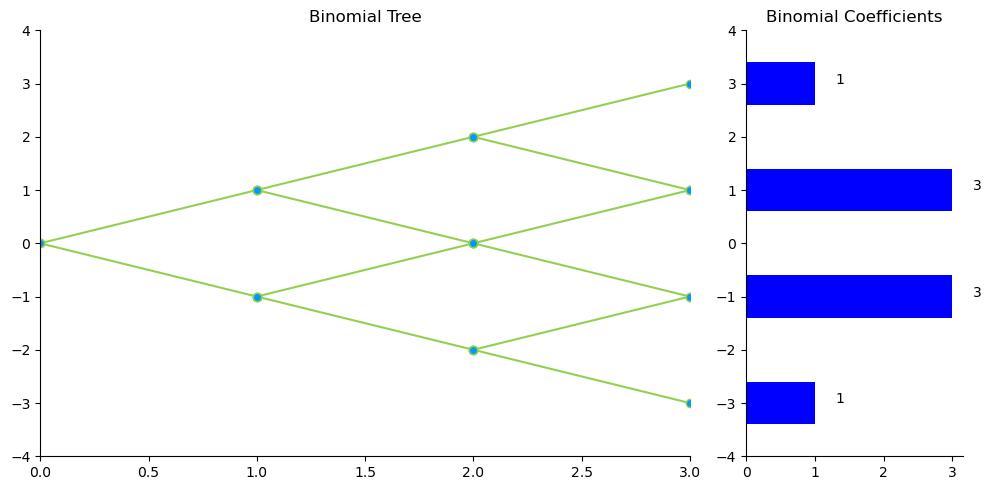

In [5]:
n = 3
fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [3, 1]})
build_binomial_tree(axes[0], n)
plot_binomial_coefficients(axes[1], n)
plt.tight_layout()
plt.show()


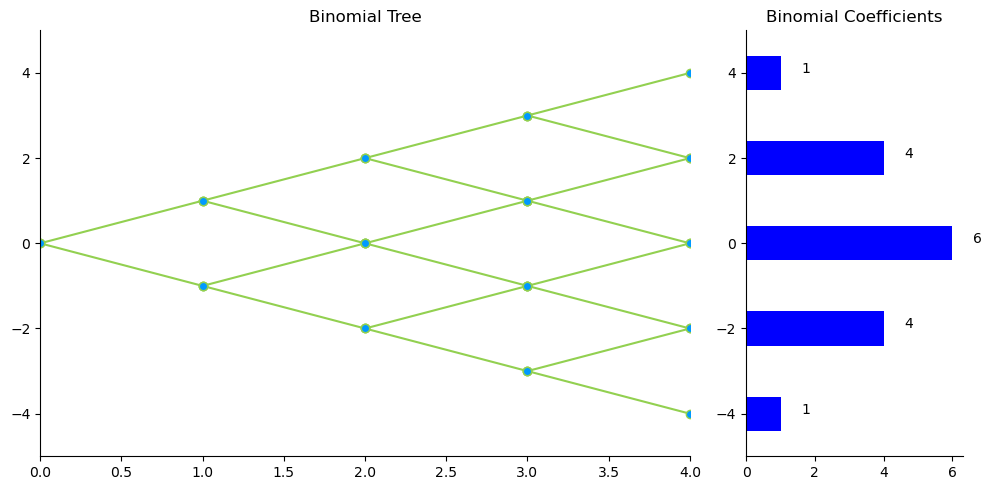

In [6]:
n = 4
fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [3, 1]})
build_binomial_tree(axes[0], n)
plot_binomial_coefficients(axes[1], n)
plt.tight_layout()
plt.show()


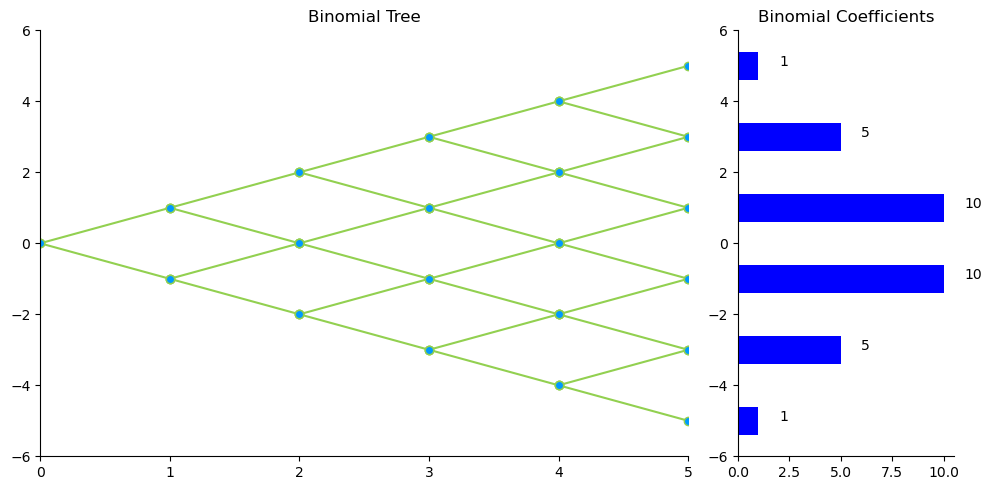

In [7]:
n = 5
fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [3, 1]})
build_binomial_tree(axes[0], n)
plot_binomial_coefficients(axes[1], n)
plt.tight_layout()
plt.show()


## 二叉树概率

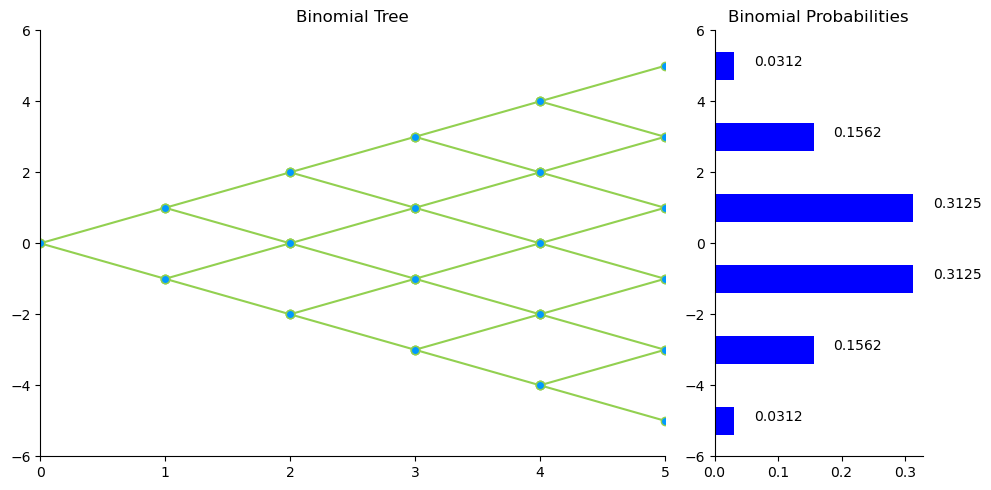

In [8]:
n = 5
fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [3, 1]})
build_binomial_tree(axes[0], n)
plot_binomial_probabilities(axes[1], n, 0.5)
plt.tight_layout()
plt.show()

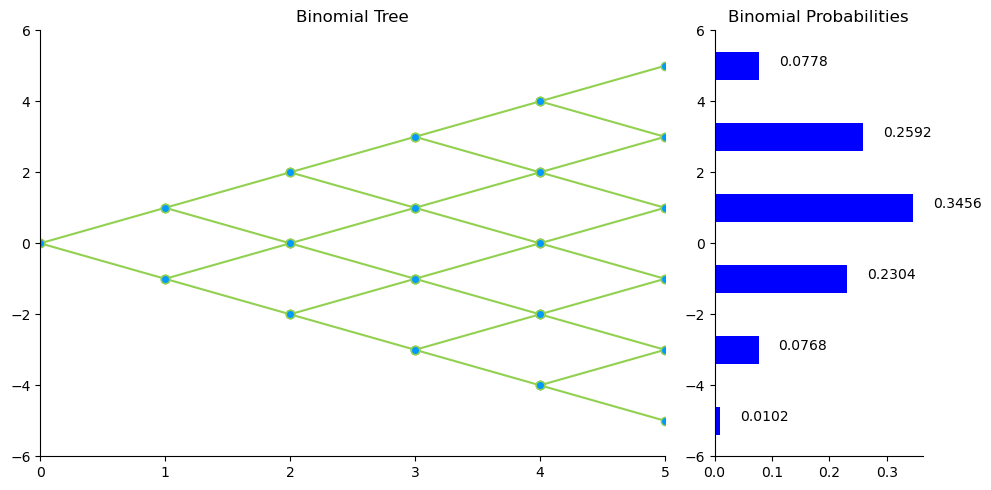

In [9]:
n = 5
fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [3, 1]})
build_binomial_tree(axes[0], n)
plot_binomial_probabilities(axes[1], n, 0.6)
plt.tight_layout()
plt.show()

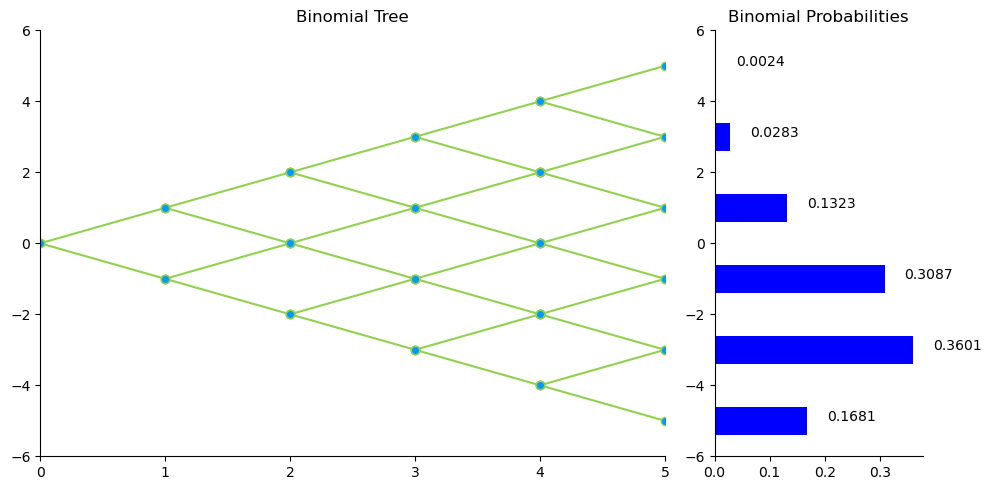

In [10]:
n = 5
fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [3, 1]})
build_binomial_tree(axes[0], n)
plot_binomial_probabilities(axes[1], n, 0.3)
plt.tight_layout()
plt.show()